# Linjär Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
n_rows = 120

true_intercept = 10.0
true_slope = 2.5
true_noise_sd = 8.0

# X = Studietimmar, jämt slumpade mellan 0, 20
hours = np.random.uniform(0, 20, size=n_rows)

noise = np.random.normal(loc=0, scale=true_noise_sd, size=n_rows)

# Y = sann linje + brus
# Y = 10 + 2.5X + brus
score = true_intercept + true_slope * hours + noise

df = pd.DataFrame({
    "study_hours": hours,
    "exam_score": score
})

df.head()

,study_hours,exam_score
0,7.490802,23.110581
1,19.014286,54.914418
2,14.639879,43.462832
3,11.973170,28.224805
4,3.120373,20.169894


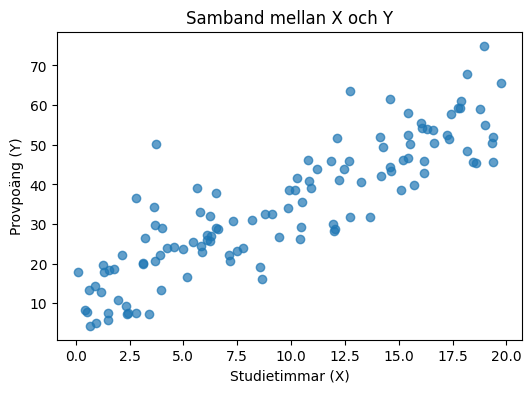

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(df["study_hours"], df["exam_score"], alpha=0.7)
plt.xlabel("Studietimmar (X)")
plt.ylabel("Provpoäng (Y)")
plt.title("Samband mellan X och Y")
plt.show()

$$\widehat{Y} = \hat{a} + \hat{b}\,X$$

$$
\hat{\beta} =
\begin{bmatrix}\hat{a}\\ \hat{b}\end{bmatrix}
= (X^\top X)^{-1} X^\top y
$$

In [5]:
x_values = df["study_hours"].values
y_values = df["exam_score"].values

# Bygg upp designmatrisen: [1, x]
ones_column = np.ones_like(x_values)
design_matrix = np.column_stack([ones_column, x_values])

transposed_design = design_matrix.T
gram_matrix = transposed_design @ design_matrix
design_response = transposed_design @ y_values

beta_hat_vector = np.linalg.inv(gram_matrix) @ design_response

intercept_hat = float(beta_hat_vector[0])
slope_hat = float(beta_hat_vector[1])

intercept_hat, slope_hat

(11.403382739651784, 2.4054380947183556)

In [6]:
y_hat_values = intercept_hat + slope_hat * x_values
residual_values = y_values - y_hat_values

y_hat_values[:5], residual_values[:5]

(array([29.42204414, 57.14107094, 46.61870499, 40.20410121, 18.90924636]),
 array([ -6.31146295,  -2.22665279,  -3.15587313, -11.97929659,
          1.26064787]))

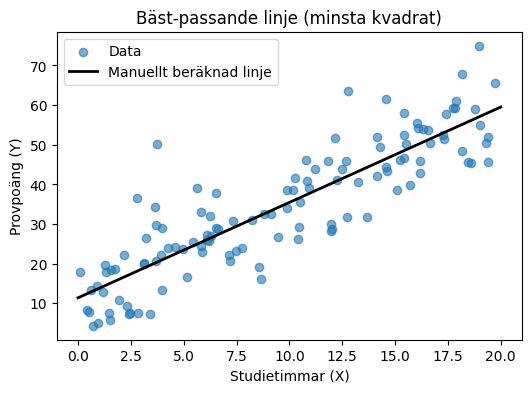

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(x_values, y_values, alpha=0.6, label="Data")

grid_x = np.linspace(0, 20, 200)
grid_y_manual = intercept_hat + slope_hat * grid_x
plt.plot(grid_x, grid_y_manual, color="black", linewidth=2, label="Manuellt beräknad linje")

plt.xlabel("Studietimmar (X)")
plt.ylabel("Provpoäng (Y)")
plt.title("Bäst-passande linje (minsta kvadrat)")
plt.legend()
plt.show()

Skattad skärning (â) = 11.40
Skattad lutning (b̂) = 2.41 poäng per timme
R² (förklarad andel) = 0.769


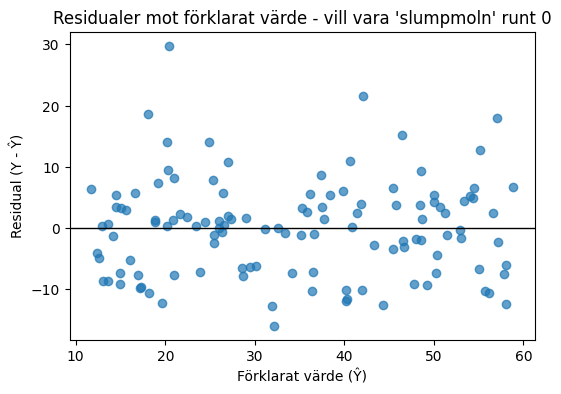

In [8]:
total_sum_of_squares = np.sum((y_values - y_values.mean())**2)
residual_sum_of_squares = np.sum(residual_values**2)

r_squared = 1 - residual_sum_of_squares / total_sum_of_squares

print(f"Skattad skärning (â) = {intercept_hat:.2f}")
print(f"Skattad lutning (b̂) = {slope_hat:.2f} poäng per timme")
print(f"R² (förklarad andel) = {r_squared:.3f}")

plt.figure(figsize=(6,4))
plt.scatter(y_hat_values, residual_values, alpha=0.7)
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Förklarat värde (Ŷ)")
plt.ylabel("Residual (Y - Ŷ)")
plt.title("Residualer mot förklarat värde - vill vara 'slumpmoln' runt 0")
plt.show()

In [15]:
def calculate_score(hours_query):
    y_hat = intercept_hat + slope_hat * hours_query
    return y_hat

print(f"Prognos vid 3 timmar {calculate_score(3):.1f}")
print(f"Prognos vid 5 timmar {calculate_score(5):.1f}")
print(f"Prognos vid 12 timmar {calculate_score(12):.1f}")
print(f"Prognos vid 20 timmar {calculate_score(20):.1f}")
print(f"Prognos vid 37 timmar {calculate_score(37):.1f}")

Prognos vid 3 timmar 18.6
Prognos vid 5 timmar 23.4
Prognos vid 12 timmar 40.3
Prognos vid 20 timmar 59.5
Prognos vid 37 timmar 100.4


In [14]:
from sklearn.linear_model import LinearRegression

x_2d = df[["study_hours"]].values
y_1d = df["exam_score"].values

linreg = LinearRegression()
linreg.fit(x_2d, y_1d)

sk_intercept = float(linreg.intercept_)
sk_slope = float(linreg.coef_[0])
sk_r2 = float(linreg.score(x_2d, y_1d))
sk_pred_12 = float(linreg.predict(np.array([[12.0]]))[0])

print(f"""
sklearn:
    intercept = {sk_intercept:.2f}
    slope = {sk_slope:.2f}
    R² = {sk_r2:.3f}
    prognos vid 12h = {sk_pred_12:.1f}
""")


sklearn:
    intercept = 11.40
    slope = 2.41
    R² = 0.769
    prognos vid 12h = 40.3



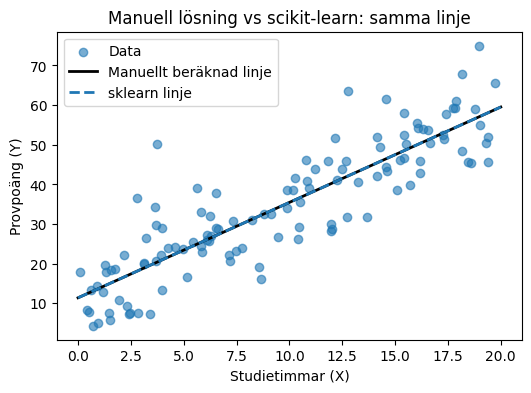

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(x_values, y_values, alpha=0.6, label="Data", zorder=1)

grid_x = np.linspace(0, 20, 200)
grid_y_manual = intercept_hat + slope_hat * grid_x
grid_y_sklearn = sk_intercept + sk_slope * grid_x

plt.plot(grid_x, grid_y_manual, color="black", linewidth=2, label="Manuellt beräknad linje", zorder=2)
plt.plot(grid_x, grid_y_sklearn, color="tab:blue", linestyle="--", linewidth=2, label="sklearn linje", zorder=3)

plt.xlabel("Studietimmar (X)")
plt.ylabel("Provpoäng (Y)")
plt.title("Manuell lösning vs scikit-learn: samma linje")
plt.legend()
plt.show()